# Classification 

### George Tzanetakis, University of Victoria 

In this notebook we go over the terminology of classification using some simple examples utilizing 
the scikit-learn framework for machine learning in Python. The first example based on images of digits is directly from a scikit-learn tutorial and the second example is based on audio feature extraction and genre classification. 

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
# We have 1797 instances of digits stored as 8x8=64 pixel images. These images are directly used as features. 
print(digits.data.shape)
# 
print(digits.data) 
# the 10th instance 
print(digits.data[10])

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[ 0.  0.  1.  9. 15. 11.  0.  0.  0.  0. 11. 16.  8. 14.  6.  0.  0.  2.
 16. 10.  0.  9.  9.  0.  0.  1. 16.  4.  0.  8.  8.  0.  0.  4. 16.  4.
  0.  8.  8.  0.  0.  1. 16.  5.  1. 11.  3.  0.  0.  0. 12. 12. 10. 10.
  0.  0.  0.  0.  1. 10. 13.  3.  0.  0.]


In [3]:
# target contains the ground truth labels for each digit 
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


In [4]:
# we can use classifier to train a model for predicting the digit 
# of an 8 by 8 image 

from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

# as a simple example we train using all the data except the last image 
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, gamma=0.001)

In [6]:
# we can predict the last instance and the result is the number 8 
print(clf.predict(digits.data[-1:]))
# predicit instance number gives as the number 1 as the prediction 
print(clf.predict([digits.data[1]]))



[8]
[1]


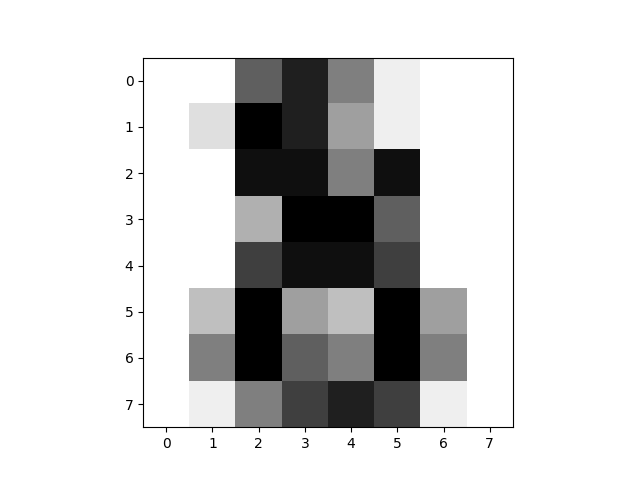

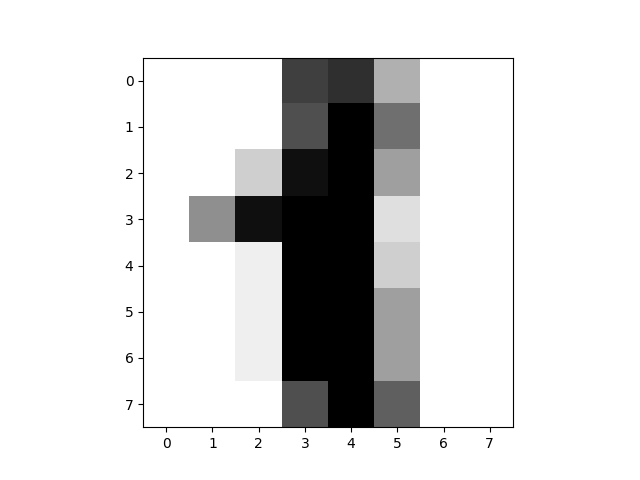

In [7]:
import matplotlib.pyplot as plt
%matplotlib widget

plt.imshow(digits.images[-1:][0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.figure()
plt.imshow(digits.images[1:][0], cmap=plt.cm.gray_r, interpolation='nearest')


In [9]:
import glob
import librosa
import numpy as np

fnames = glob.glob("C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original/*/*.wav")

genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'rock', 'blues', 'reggae', 'pop', 'metal']

# allocate matrix for audio features and target 
audio_features = np.zeros((len(fnames), 40))
target = np.zeros(len(fnames))

# compute the features 
for (i,fname) in enumerate(fnames): 
    print("Processing %d %s" % (i, fname))
    for (label,genre) in enumerate(genres): 
        if genre in fname: 
            audio, srate = librosa.load(fname)
            mfcc_matrix = librosa.feature.mfcc(y=audio, sr=srate)
            mean_mfcc = np.mean(mfcc_matrix,axis=1)
            std_mfcc = np.std(mfcc_matrix, axis=1)
            audio_fvec = np.hstack([mean_mfcc, std_mfcc])
            audio_features[i] = audio_fvec
            target[i] = label

print(audio_features.shape)



Processing 0 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00000.wav
Processing 1 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00001.wav
Processing 2 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00002.wav
Processing 3 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00003.wav
Processing 4 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00004.wav
Processing 5 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00005.wav
Processing 6 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/

In [10]:
from sklearn import svm, metrics
from sklearn.model_selection import cross_val_predict

clf = svm.SVC(gamma='scale', kernel='linear')
clf.fit(audio_features, target)
predicted = cross_val_predict(clf, audio_features, target, cv=10)

print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[85  2  0  0 11  2  0  0  0  0]
 [ 0 50  9  0  7 12 11  5  5  1]
 [ 1  8 60 11  0  8  4  2  5  1]
 [ 0  2 10 61  0  1  5 17  1  3]
 [ 7  7  2  0 71  7  6  0  0  0]
 [ 0  7 19  5  3 36 18  3  3  6]
 [ 1 16  9  3 15  7 34  7  0  8]
 [ 2  7  9 23  1  3  4 45  5  1]
 [ 1  5 10  7  1  2  0  4 70  0]
 [ 0  3  4  9  0  9  3  1  0 71]]
Classification report for classifier SVC(kernel='linear'):
0.583



In [11]:
# perform 10-fold cross-validation to calculate accuracy and confusion matrix 
predicted = cross_val_predict(clf, audio_features, target, cv=10)

In [12]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(target, predicted))
print("\nClassification accuracy:%s\n"
      % (metrics.accuracy_score(target, predicted)))

Confusion matrix:
[[85  2  0  0 11  2  0  0  0  0]
 [ 0 50  9  0  7 12 11  5  5  1]
 [ 1  8 60 11  0  8  4  2  5  1]
 [ 0  2 10 61  0  1  5 17  1  3]
 [ 7  7  2  0 71  7  6  0  0  0]
 [ 0  7 19  5  3 36 18  3  3  6]
 [ 1 16  9  3 15  7 34  7  0  8]
 [ 2  7  9 23  1  3  4 45  5  1]
 [ 1  5 10  7  1  2  0  4 70  0]
 [ 0  3  4  9  0  9  3  1  0 71]]

Classification accuracy:0.583



In [13]:
import random 
i = random.randint(0, 1000)
predicted_label = int(clf.predict([audio_features[i]]))
print("Prediction for %d %s is %s"% (i, fnames[i], genres[predicted_label]))


Prediction for 907 C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\rock\rock.00007.wav is rock


C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_23608\4141437741.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(clf.predict([audio_features[i]]))


In [26]:
import IPython.display as ipd

# I know that for this file the prediction is wrong 
i = 98 
predicted_label = int(clf.predict([audio_features[i]]))
print("Prediction for %s is %s"% (fnames[i], genres[predicted_label]))
# Lets listen to it 
audio, srate = librosa.load(fnames[i])
ipd.Audio(audio, rate =srate)

Prediction for C:/Users/g.aramburorodriguez/OneDrive - L-Acoustics/Documents/Python/mir_program_kadenze/course2/data/genres_original\blues\blues.00098.wav is blues


C:\Users\g.aramburorodriguez\AppData\Local\Temp\ipykernel_23608\3618875017.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(clf.predict([audio_features[i]]))


Before ending this notebook I would like to mention how impressive it is that with a few lines of Python code and the right libraries we were able to do a full music genre classification system. Twenty years ago building such a system required many lines of C++ code and formed a large part of my PhD thesis which was completed in 2002. The journal article describing this work called "Musical Genre Classification of Audio Signal" is considered a classic paper in MIR. 